<a href="https://colab.research.google.com/github/Vastav1812/ML-Prediction-Model/blob/main/Prediction01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas scikit-learn matplotlib pyxlsb


In [4]:
from google.colab import files
uploaded = files.upload()  # to upload files from your local machine


Saving 202304.xlsb to 202304.xlsb
Saving 202305.xlsb to 202305.xlsb
Saving 202306.xlsb to 202306.xlsb
Saving 202307.xlsb to 202307.xlsb
Saving 202308.xlsb to 202308.xlsb
Saving 202309.xlsb to 202309.xlsb
Saving 202310.xlsb to 202310.xlsb
Saving 202311.xlsb to 202311.xlsb
Saving 202312.xlsb to 202312.xlsb
Saving 202401.xlsb to 202401.xlsb
Saving 202402.xlsb to 202402.xlsb
Saving 202403.xlsb to 202403.xlsb


In [5]:
!ls  # Lists all files in the current directory


202304.xlsb  202306.xlsb  202308.xlsb  202310.xlsb  202312.xlsb  202402.xlsb  sample_data
202305.xlsb  202307.xlsb  202309.xlsb  202311.xlsb  202401.xlsb  202403.xlsb


In [6]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Function to load .xlsb files
def load_and_combine_xlsb(files):
    combined_data = pd.DataFrame()
    for file in files:
        df = pd.read_excel(file, engine='pyxlsb')
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

# List of file paths (update with your file paths)
file_paths = [
    '202304.xlsb',
    '202305.xlsb',
    '202306.xlsb',
    '202307.xlsb',
    '202308.xlsb',
    '202309.xlsb',
    '202310.xlsb',
    '202311.xlsb',
    '202312.xlsb',
    '202401.xlsb',
    '202402.xlsb',
    '202403.xlsb'
]

# Load and combine the files
data = load_and_combine_xlsb(file_paths)

# Check the first few rows of the combined dataset
print(data.head())


       id unique_id                         date     beno    hscode  \
0  414190  2304_223  2023-04-05T00:00:00.0000000  5381617  39012000   
1  414191  2304_224  2023-04-06T00:00:00.0000000  5392284  39012000   
2  414192  2304_225  2023-04-09T00:00:00.0000000  5439235  39019000   
3  414193  2304_226  2023-04-18T00:00:00.0000000  5566659  39012000   
4  414194  2304_227  2023-04-18T00:00:00.0000000  5570918  39012000   

                                           prod_desc  data_key company  \
0  HDPE REPROCESSE GRANULES (C. NO. KL-2023-AI-21...       NaN       0   
1                                        HDPE HF1881       NaN   SHARQ   
2  POLYETHYLENE CL BLACK MASTERBATCH BK00016 BATC...       NaN       0   
3  HDPE REGRIND (NON HAZARDOUS) ASEAN NO KL-2023-...       NaN       0   
4                             HDPE REGRIND (RECYCLE)       NaN       0   

  product fbt_category  ...      fin_cif fin_qty unitrate_inr unitrate_usd  \
0   OTHER          NaN  ...   818.250000  54.000  

In [7]:
# Drop rows with missing values in important columns
data_cleaned = data.dropna(subset=['unitrate_inr', 'fin_qty', 'unitrate_usd'])

# Convert 'date' column to a datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Convert categorical columns (like company, product, shipment_mode) into numeric values
data_cleaned = pd.get_dummies(data_cleaned, columns=['company', 'product', 'shipment_mode'], drop_first=True)

# Display the cleaned data
print(data_cleaned.head())


       id unique_id       date     beno    hscode  \
0  414190  2304_223 2023-04-05  5381617  39012000   
1  414191  2304_224 2023-04-06  5392284  39012000   
2  414192  2304_225 2023-04-09  5439235  39019000   
3  414193  2304_226 2023-04-18  5566659  39012000   
4  414194  2304_227 2023-04-18  5570918  39012000   

                                           prod_desc  data_key fbt_category  \
0  HDPE REPROCESSE GRANULES (C. NO. KL-2023-AI-21...       NaN          NaN   
1                                        HDPE HF1881       NaN          NaN   
2  POLYETHYLENE CL BLACK MASTERBATCH BK00016 BATC...       NaN          NaN   
3  HDPE REGRIND (NON HAZARDOUS) ASEAN NO KL-2023-...       NaN          NaN   
4                             HDPE REGRIND (RECYCLE)       NaN          NaN   

              grade          sector  ... product_OTHER product_Other  \
0  HDPE REPROCESSED  HD-REPROCESSED  ...          True         False   
1           HDPE F1         HM FILM  ...         False        

In [8]:
# Selecting features and the target variable
features = data_cleaned[['fin_qty', 'unitrate_usd'] + [col for col in data_cleaned.columns if col.startswith('company_') or col.startswith('product_') or col.startswith('shipment_mode_')]]
target = data_cleaned['unitrate_inr']


In [9]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shape of the data
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


Training data shape:  (43574, 130)
Testing data shape:  (10894, 130)


In [10]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 247510.30544426845
Mean Absolute Error: 114.45211582436804


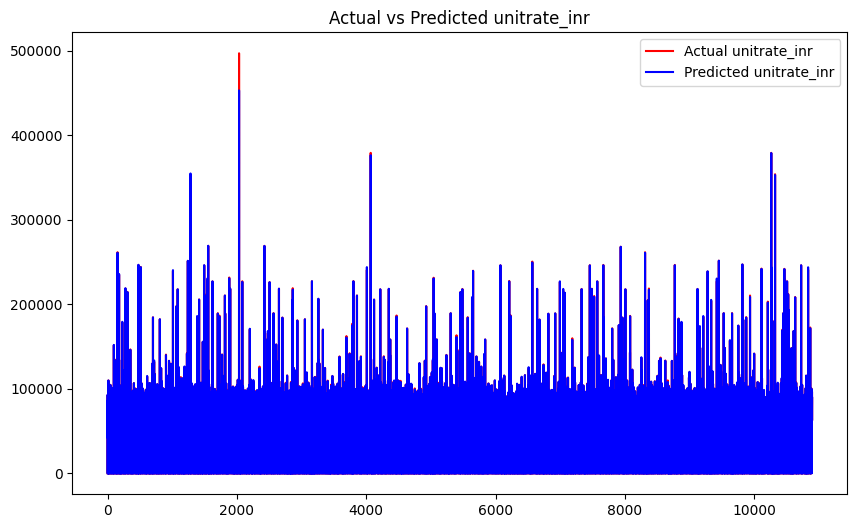

In [14]:
# Plot actual vs predicted unitrate_inr
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual unitrate_inr', color='red')
plt.plot(y_pred, label='Predicted unitrate_inr', color='blue')
plt.title('Actual vs Predicted unitrate_inr')
plt.legend()
plt.show()
